# [Classification] : Heart Failure Prediction

[source] : https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

------------------

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/heart_failure_clinical_records_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


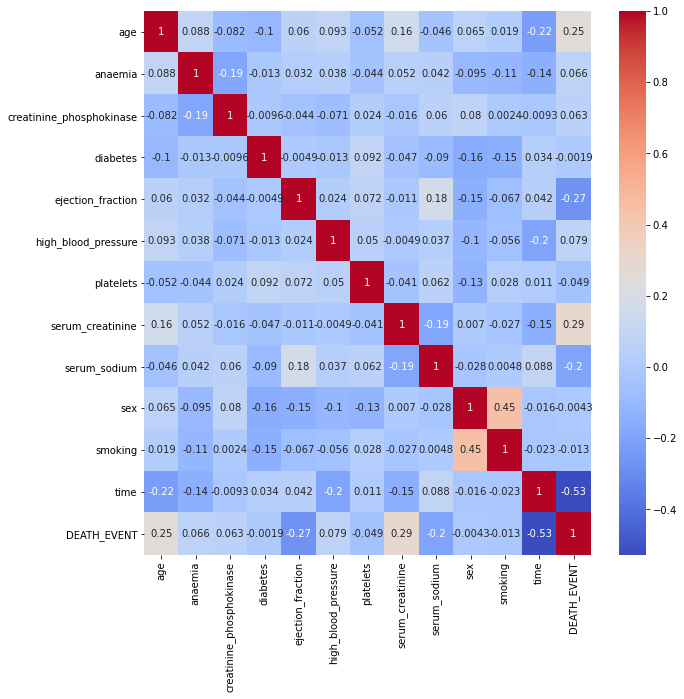

In [141]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True);

In [142]:
df.corr()['DEATH_EVENT'].sort_values()

time                       -0.526964
ejection_fraction          -0.268603
serum_sodium               -0.195204
platelets                  -0.049139
smoking                    -0.012623
sex                        -0.004316
diabetes                   -0.001943
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
age                         0.253729
serum_creatinine            0.294278
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

## 수치형 데이터의 히스토그램

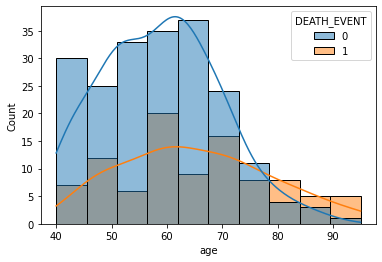

In [5]:
# 오른쪽이 길면 롱테일
sns.histplot(data=df, x='age', hue='DEATH_EVENT', kde=True)

In [6]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

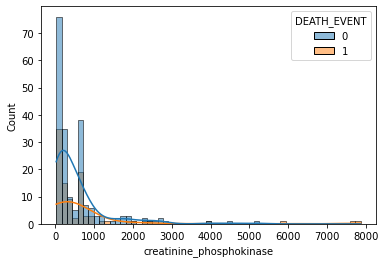

In [7]:
sns.histplot(data=df, x='creatinine_phosphokinase', hue='DEATH_EVENT', kde=True)

아웃라이어가 많음

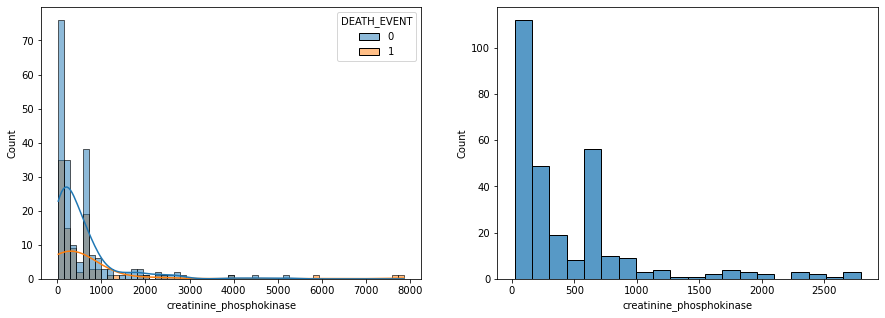

In [8]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(15,5)

sns.histplot(data=df, x='creatinine_phosphokinase', hue='DEATH_EVENT', kde=True, ax=ax1)
sns.histplot(data=df[df['creatinine_phosphokinase']<3000]['creatinine_phosphokinase'], ax=ax2)

plt.show()

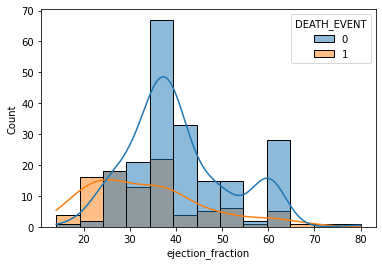

In [9]:
sns.histplot(data=df, x='ejection_fraction', kde=True, bins=13, hue='DEATH_EVENT')

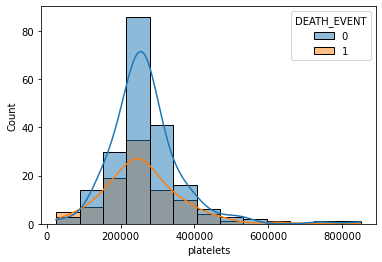

In [10]:
sns.histplot(data=df, x='platelets', kde=True, bins=13, hue='DEATH_EVENT')

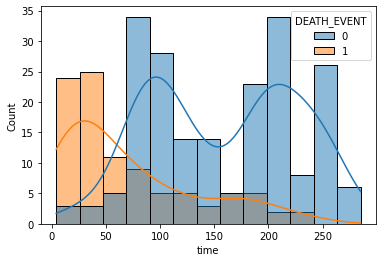

In [46]:
sns.histplot(data=df, x='time', kde=True, bins=13, hue='DEATH_EVENT')

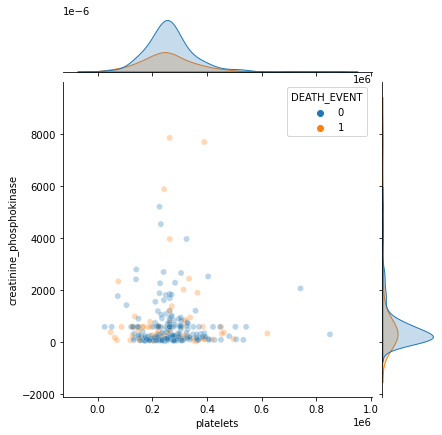

In [66]:
sns.jointplot(x='platelets', y='creatinine_phosphokinase', data=df, hue='DEATH_EVENT', alpha=0.3)

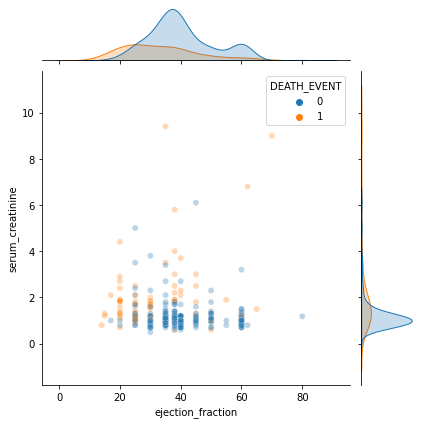

In [68]:
sns.jointplot(x='ejection_fraction', y='serum_creatinine', data=df, hue='DEATH_EVENT', alpha=0.3)

## Boxplot 계열을 이용하여 범주별 통계 확인하기

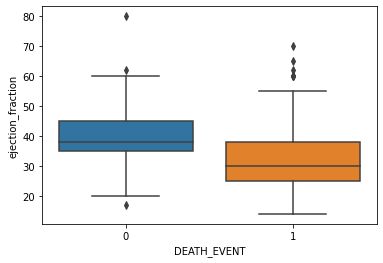

In [12]:
sns.boxplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

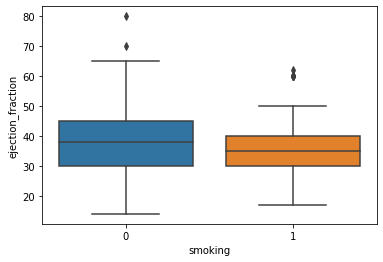

In [13]:
sns.boxplot(x='smoking', y='ejection_fraction', data=df)

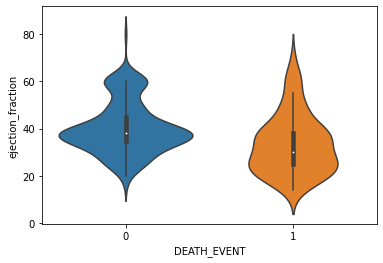

In [14]:
sns.violinplot(x='DEATH_EVENT', y='ejection_fraction', data=df)

C:\Users\44455\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 9.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


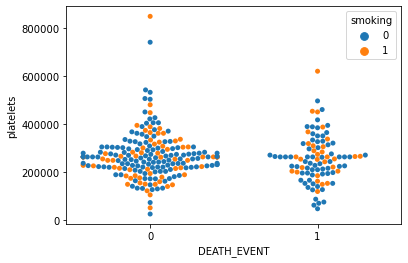

In [15]:
sns.swarmplot(x='DEATH_EVENT', y='platelets', data=df, hue='smoking')

-----------------

# 모델 학습을 위한 데이터 전처리

In [183]:
from sklearn.preprocessing import StandardScaler

In [184]:
X_cat = df[['anaemia', 'diabetes','high_blood_pressure', 'sex', 'smoking']]
X_num = df[['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']]

y = df['DEATH_EVENT']

### 1. 스케일링

In [185]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_num)

In [186]:
X_num.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,75.0,582,20,265000.00,1.9,130,4
1,55.0,7861,38,263358.03,1.1,136,6
2,65.0,146,20,162000.00,1.3,129,7
3,50.0,111,20,210000.00,1.9,137,7
4,65.0,160,20,327000.00,2.7,116,8


In [187]:
x_scaled = pd.DataFrame(data=x_scaled, index=X_num.index, columns=X_num.columns)
x_scaled.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879


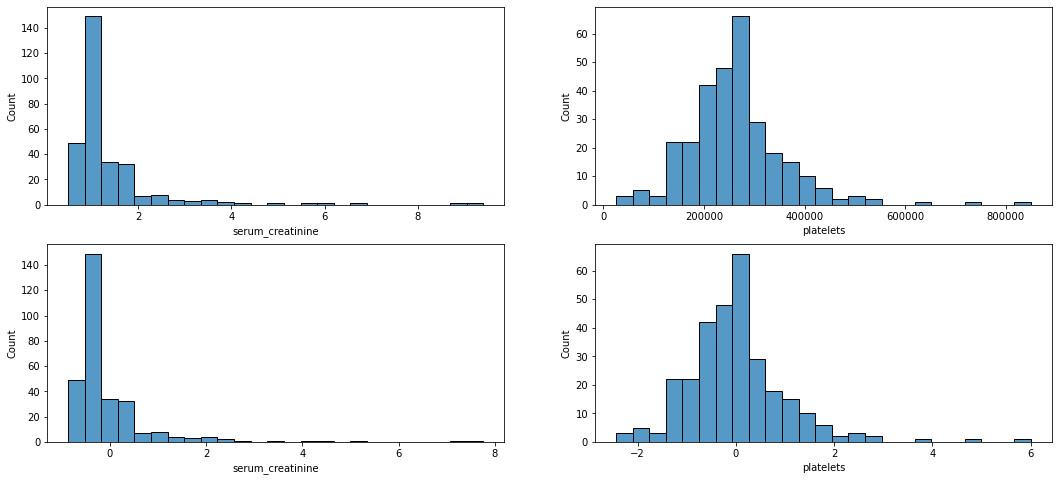

In [188]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols=2, nrows=2)
figure.set_size_inches(18,8)

# 스케일링 적용 전
sns.histplot(df['serum_creatinine'], bins=25, ax=ax1)
sns.histplot(df['platelets'], bins=25, ax=ax2)

# 스케일링 적용 후
sns.histplot(x_scaled['serum_creatinine'], bins=25, ax=ax3)
sns.histplot(x_scaled['platelets'], bins=25, ax=ax4)

#### ▶ 스케일링을 적용하면, 숫자가 크게 바뀌지만(더 작은 단위의 수로 치환) 원본 데이터의 분포는 전혀 변하지 않는다

In [189]:
X = pd.concat([x_scaled, X_cat], axis=1)

In [190]:
X

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,0,0,1,1,0
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,0,0,0,1,0
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,0,0,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1,0,0,1,0
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.537688,-0.007077,-1.109765e+00,-0.284552,1.447094,1.803451,0,1,1,1,1
295,-0.491279,1.278215,-0.007077,6.802472e-02,-0.187726,0.539054,1.816357,0,0,0,0,0
296,-1.333392,1.525979,1.854958,4.902082e+00,-0.575031,0.312044,1.906697,0,1,0,0,0
297,-1.333392,1.890398,-0.007077,-1.263389e+00,0.005926,0.766064,1.932509,0,0,0,1,1


------------------

# 데이터 분리 (학습 데이터&테스트 데이터)

In [191]:
df.corr()['DEATH_EVENT'].sort_values()

time                       -0.526964
ejection_fraction          -0.268603
serum_sodium               -0.195204
platelets                  -0.049139
smoking                    -0.012623
sex                        -0.004316
diabetes                   -0.001943
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
age                         0.253729
serum_creatinine            0.294278
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

In [192]:
X = X[['time','ejection_fraction','serum_sodium','serum_creatinine', 'age']]

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y, shuffle=True, test_size=0.3)

In [195]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(209, 5)
(90, 5)
(209,)
(90,)


------------------

# Classification 모델 생성/학습

In [196]:
from sklearn.linear_model import LogisticRegression

In [197]:
model_rl = LogisticRegression(max_iter=100)
model_rl.fit(X_train, y_train)

LogisticRegression()

# 모델 학습 결과 평가하기

In [198]:
from sklearn.metrics import classification_report

In [199]:
pred = model_rl.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        61
           1       0.77      0.69      0.73        29

    accuracy                           0.83        90
   macro avg       0.81      0.80      0.80        90
weighted avg       0.83      0.83      0.83        90



# XGBosot 모델 생성/학습

In [201]:
from xgboost import XGBClassifier

In [202]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

[03:42:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\44455\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [203]:
pred = model_xgb.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88        61
           1       0.74      0.79      0.77        29

    accuracy                           0.84        90
   macro avg       0.82      0.83      0.82        90
weighted avg       0.85      0.84      0.85        90



### feature importances 확인

In [204]:
model_xgb.feature_importances_

array([0.3924418 , 0.23573197, 0.09648337, 0.16260488, 0.11273799],
      dtype=float32)

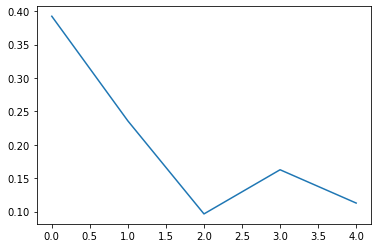

In [205]:
plt.plot(model_xgb.feature_importances_)

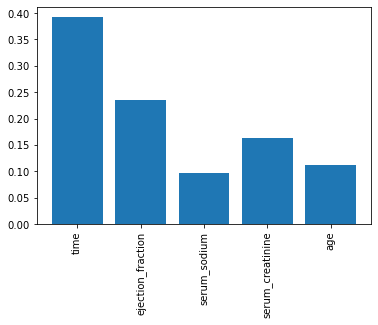

In [206]:
plt.bar(X.columns, model_xgb.feature_importances_)
plt.xticks(rotation=90)
plt.show()

# 모델 결과 심화 분석하기

In [100]:
from sklearn.metrics import plot_precision_recall_curve

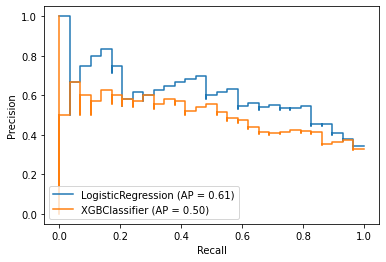

In [101]:
fig = plt.figure()
ax=fig.gca()

plot_precision_recall_curve(model_rl, X_test, y_test, ax=ax)
plot_precision_recall_curve(model_xgb, X_test, y_test, ax=ax)

#### AP 의미 : 1에 가까울수록 recall을 증가시키면서 잘 유지했음을 의미 
#### >> Logistic Regression 이 성능이 더 잘 나옴

### ROC Curve

In [102]:
from sklearn.metrics import plot_roc_curve

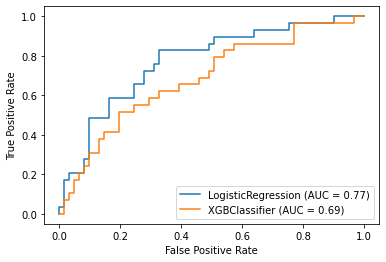

In [103]:
fig = plt.figure()
ax=fig.gca()

plot_roc_curve(model_rl, X_test, y_test, ax=ax)
plot_roc_curve(model_xgb, X_test, y_test, ax=ax)

 False Positive Rate이 낮으면서 True Positive Rate이 1에 이르는 가장 빠른 시점을 찾기 위함. 
- 왼쪽 위 구석에 위치할수록 좋음